In [1]:
import pandas as pd
import numpy as np

In [2]:
data_frame = pd.read_parquet('./dataset/relevance_challenge_valid.parquet')

In [3]:
def softmax(x):
    # Compute the exponential values for each element in the input array
    exps = np.exp(x - np.max(x))

    # Compute the softmax values by dividing the exponential of each element by the sum of exponentials
    return exps / np.sum(exps)  

In [4]:
data_frame['probabilities'] = data_frame['raw_prediction'].apply(softmax)

In [5]:
bins = [0, 0.1, 0.2, 0.3, 1.0]

probabilities = data_frame['probabilities'].values
probabilities

array([array([1.0701745e-05, 3.0589050e-03, 1.1691522e-05, ..., 2.6032150e-05,
              1.1091998e-05, 2.5502461e-05], dtype=float32)                   ,
       array([4.49231920e-05, 4.37965238e-04, 7.01508368e-04, ...,
              5.86358547e-05, 1.19782715e-04, 1.44674719e-04], dtype=float32),
       array([6.8960690e-05, 5.7571520e-05, 6.7080755e-04, ..., 1.5246231e-04,
              2.9068040e-05, 2.0424993e-04], dtype=float32)                   ,
       ...,
       array([7.9940692e-05, 1.2463288e-04, 5.2878973e-03, ..., 4.0360184e-05,
              6.9534231e-05, 3.8948891e-04], dtype=float32)                   ,
       array([1.7136848e-04, 7.1163510e-04, 1.3841296e-04, ..., 6.5322194e-05,
              2.1939288e-04, 3.6347017e-05], dtype=float32)                   ,
       array([1.6614320e-03, 5.0464903e-05, 1.1213181e-04, ..., 3.3844783e-05,
              4.2440792e-05, 3.4518613e-05], dtype=float32)                   ],
      dtype=object)

In [6]:
histograms = []
for row in probabilities:
    histograms.append(np.histogram(row, bins=bins)[0])

In [7]:
histograms = np.array(histograms)
histograms = np.delete(histograms, 0, 1)
histograms

array([[0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [8]:
column_names = [f'{bins[i]}_{bins[i+1]}' for i in range(len(bins) - 1)]

histograms = histograms.T

In [9]:
data_frame[column_names[1]] = histograms[0]
data_frame[column_names[2]] = histograms[1]
data_frame[column_names[3]] = histograms[2]

In [10]:
data_frame.head(5)

,text,coordinates,label,raw_prediction,confidence,distance,probabilities,0.1_0.2,0.2_0.3,0.3_1.0
246274,i'm at jalboot village in al ahmadi https://t....,"[47.78220261841334, 28.796369578665622]",1478,"[-0.16533367, 5.490072, -0.07687697, -0.028137...",0.097776,413.620188,"[1.0701745e-05, 0.003058905, 1.1691522e-05, 1....",0,0,0
19954,just posted a photo @ fringes https://t.co/ma1...,"[-114.60882437411358, 51.21439841204866]",469,"[-2.382054, -0.10486849, 0.36622486, -0.755341...",0.158510,7096.152333,"[4.4923192e-05, 0.00043796524, 0.00070150837, ...",1,0,0
4850,"ok, cleveland. here's the plan.\n\nwe need you...","[-75.0323028333211, 39.476737451506004]",385,"[-2.481499, -2.6620083, -0.20655325, -0.289278...",0.175566,607.165365,"[6.896069e-05, 5.757152e-05, 0.00067080755, 0....",1,0,0
108015,@maisamo15677972 esgotada,"[-46.45847010250085, -5.46301167598722]",2323,"[3.0630562, -1.9455369, -1.4932183, -1.8799204...",0.015767,1200.366641,"[0.010265744, 6.85782e-05, 0.0001078017, 7.322...",0,0,0
278357,@mzfrancesfx @moore10112 perfect date night!!,"[-91.9513874234886, 42.12479709049989]",682,"[-2.7112045, -2.0834854, 0.080568545, -0.49260...",0.010079,6900.667485,"[0.00014184894, 0.00026573037, 0.0023135445, 0...",0,0,0


In [11]:
data_frame = data_frame.sort_values('distance',ascending=False)
peaks_data_frame = data_frame[['0.1_0.2', '0.2_0.3', '0.3_1.0','distance']]
peaks_data_frame['0.1'] = peaks_data_frame['0.1_0.2'] + peaks_data_frame['0.2_0.3'] + peaks_data_frame['0.3_1.0']
peaks_data_frame['0.2'] = peaks_data_frame['0.2_0.3'] + peaks_data_frame['0.3_1.0']
peaks_data_frame['0.3'] = peaks_data_frame['0.3_1.0']

peaks_data_frame.drop(['0.1_0.2', '0.2_0.3', '0.3_1.0'], axis=1, inplace=True)

/tmp/ipykernel_18361/3443682362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks_data_frame['0.1'] = peaks_data_frame['0.1_0.2'] + peaks_data_frame['0.2_0.3'] + peaks_data_frame['0.3_1.0']
/tmp/ipykernel_18361/3443682362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks_data_frame['0.2'] = peaks_data_frame['0.2_0.3'] + peaks_data_frame['0.3_1.0']
/tmp/ipykernel_18361/3443682362.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

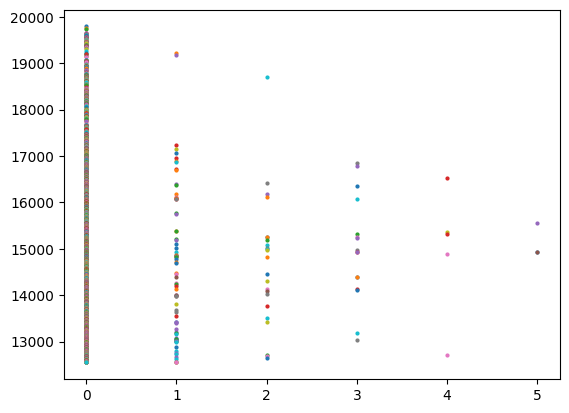

In [12]:
import matplotlib.pyplot as plt

# 0.1

n_rows = 3000
fig, ax = plt.subplots(sharex=True, sharey=True)

for j in range(n_rows):
    y_values = peaks_data_frame['distance'].iloc[j]
    x_values = peaks_data_frame['0.1'].iloc[j]
    ax.scatter(x_values, y_values, s=4, alpha=1)

plt.show()

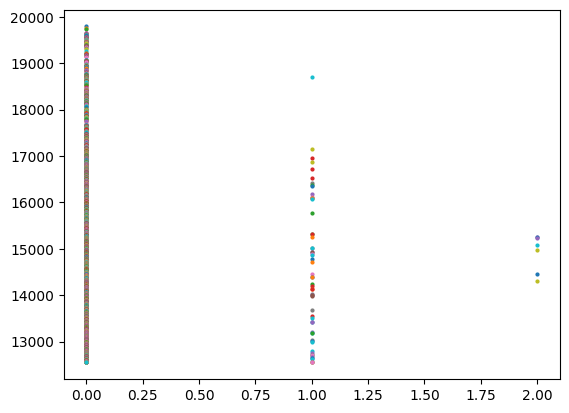

In [60]:
# 0.2

n_rows = 3000
fig, ax = plt.subplots(sharex=True, sharey=True)

for j in range(n_rows):
    y_values = peaks_data_frame['distance'].iloc[j]
    x_values = peaks_data_frame['0.2'].iloc[j]
    ax.scatter(x_values, y_values, s=4, alpha=1)

plt.show()

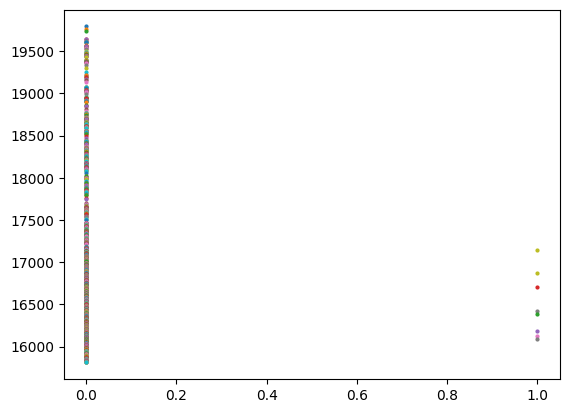

In [61]:
#0.3

n_rows = 1000

fig, ax = plt.subplots(sharex=True, sharey=True)

for j in range(n_rows):
    y_values = peaks_data_frame['distance'].iloc[j]
    x_values = peaks_data_frame['0.3'].iloc[j]
    ax.scatter(x_values, y_values, s=4, alpha=1)
    
plt.show()

In [62]:
peaks_data_frame = peaks_data_frame.sort_values('distance', ascending=True).iloc[0:int(0.1*len(data_frame))]

In [63]:
peaks_data_frame['0.1'].value_counts()

0    1898
1    1671
2    1142
3     554
4     209
5      55
6       6
Name: 0.1, dtype: int64

In [64]:
peaks_data_frame['0.2'].value_counts()

0    2800
1    1978
2     697
3      60
Name: 0.2, dtype: int64

In [65]:
peaks_data_frame['0.3'].value_counts()

0    3331
1    1860
2     344
Name: 0.3, dtype: int64

In [115]:
data_frame_1 = data_frame[ data_frame['0.1_0.2'] +data_frame['0.2_0.3']+data_frame['0.3_1.0'] == 1].iloc[0:400]
data_frame_1 = data_frame_1.append(data_frame[ data_frame['0.1_0.2'] +data_frame['0.2_0.3']+data_frame['0.3_1.0'] == 2].iloc[0:400])
data_frame_1 = data_frame_1.append(data_frame[ data_frame['0.1_0.2'] +data_frame['0.2_0.3']+data_frame['0.3_1.0'] == 3].iloc[0:400])
data_frame_1 = data_frame_1.append(data_frame[ data_frame['0.1_0.2'] +data_frame['0.2_0.3']+data_frame['0.3_1.0'] == 4].iloc[0:400])
data_frame_1 = data_frame_1.append(data_frame[ data_frame['0.1_0.2'] +data_frame['0.2_0.3']+data_frame['0.3_1.0'] == 5].iloc[0:400])

/tmp/ipykernel_13499/2567935389.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_1 = data_frame_1.append(data_frame[ data_frame['0.1_0.2'] +data_frame['0.2_0.3']+data_frame['0.3_1.0'] == 2].iloc[0:400])
/tmp/ipykernel_13499/2567935389.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_1 = data_frame_1.append(data_frame[ data_frame['0.1_0.2'] +data_frame['0.2_0.3']+data_frame['0.3_1.0'] == 3].iloc[0:400])
/tmp/ipykernel_13499/2567935389.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame_1 = data_frame_1.append(data_frame[ data_frame['0.1_0.2'] +data_frame['0.2_0.3']+data_frame['0.3_1.0'] == 4].iloc[0:400])
/tmp/ipykernel_13499/2567935389.py:5: FutureWarning: The frame.append method is de

In [116]:
data_frame_1['0.1_0.2'].value_counts()

1    455
2    362
3    362
4    255
0    237
5    132
Name: 0.1_0.2, dtype: int64

In [117]:
peaks_data_frame = data_frame_1[['0.1_0.2', '0.2_0.3', '0.3_1.0','distance']]
peaks_data_frame['peaks'] = peaks_data_frame['0.1_0.2'] + peaks_data_frame['0.2_0.3'] + peaks_data_frame['0.3_1.0']

peaks_data_frame.drop(['0.1_0.2', '0.2_0.3', '0.3_1.0'], axis=1, inplace=True)

/tmp/ipykernel_13499/1520260184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks_data_frame['peaks'] = peaks_data_frame['0.1_0.2'] + peaks_data_frame['0.2_0.3'] + peaks_data_frame['0.3_1.0']
/tmp/ipykernel_13499/1520260184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks_data_frame.drop(['0.1_0.2', '0.2_0.3', '0.3_1.0'], axis=1, inplace=True)


In [121]:
peaks_data_frame['peaks'].value_counts()

array([400, 400, 400, 400, 203])

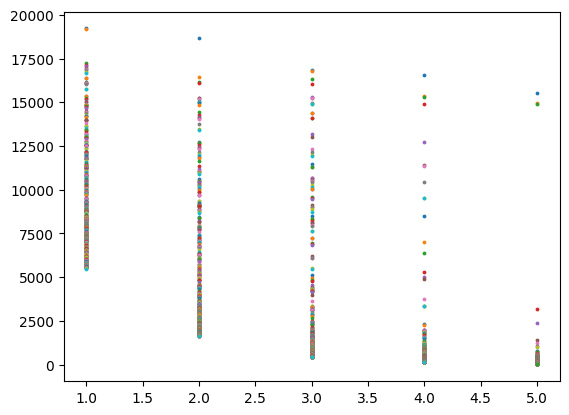

In [119]:
# peaks

n_rows = len(data_frame_1)
fig, ax = plt.subplots(sharex=True, sharey=True)

for j in range(n_rows):
    y_values = peaks_data_frame['distance'].iloc[j]
    x_values = peaks_data_frame['peaks'].iloc[j]
    ax.scatter(x_values, y_values, s=3, alpha=1)

plt.show()

In [133]:
means = [peaks_data_frame[peaks_data_frame['peaks'] == i]['distance'].mean() for i in peaks_data_frame['peaks'].value_counts().index.to_list()]
x = peaks_data_frame['peaks'].value_counts().index.to_list()

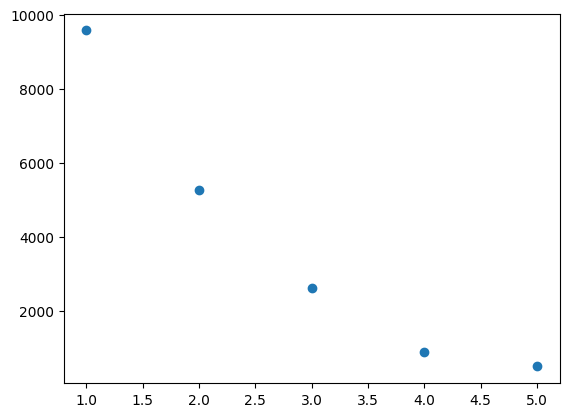

In [137]:
fig, ax = plt.subplots(sharex=True, sharey=True)
ax.scatter(x, means)

plt.show()

In [14]:
# clearly number of peaks is a good feature
# max confidence is also a good feature

data_frame['peaks'] = data_frame['0.1_0.2'] + data_frame['0.2_0.3'] + data_frame['0.3_1.0']
data_frame.sort_values('confidence', ascending=True, inplace=True)
data_frame['distance'].describe()

count    55350.000000
mean      3260.978350
std       4202.391081
min          0.751505
25%        378.965748
50%       1254.280157
75%       4598.103009
max      19791.642460
Name: distance, dtype: float64

In [20]:
data_set = data_frame[['confidence','peaks','distance']]
data_set['features'] = data_set[['confidence' ,'peaks']].values.tolist()
data_set['label'] = data_set['distance'].apply(lambda x: 1/x)

data_set.drop(['confidence','peaks','distance'], axis=1, inplace=True)

/tmp/ipykernel_18361/3143293065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['features'] = data_set[['confidence' ,'peaks']].values.tolist()
/tmp/ipykernel_18361/3143293065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['label'] = data_set['distance'].apply(lambda x: 1/x)
/tmp/ipykernel_18361/3143293065.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [21]:
data_set.head(5)

,features,label
308784,"[0.001972598023712635, 0.0]",0.000203
562250,"[0.002010819735005498, 0.0]",0.000167
611163,"[0.0020261991303414106, 0.0]",0.001158
17688,"[0.0020325526129454374, 0.0]",0.000878
309492,"[0.0020877732895314693, 0.0]",0.000105


In [22]:
data_set.count()

features    55350
label       55350
dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(data_set['features'].tolist(), data_set['label'].tolist())

LinearRegression()

In [25]:
model.coef_

array([0.03677514, 0.00149212])

In [26]:
data_frame['score'] = data_frame['confidence'] * model.coef_[0] + data_frame['peaks'] * model.coef_[1]
data_frame.sort_values('score', ascending=False, inplace=True)
data_frame_filtered = data_frame.iloc[0:int(0.1*len(data_frame))]
data_frame_filtered['distance'].describe()

count     5535.000000
mean       655.377445
std       1986.663024
min          2.974029
25%         32.149999
50%         82.422675
75%        297.806394
max      17147.333877
Name: distance, dtype: float64